In [1]:
import copy

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pygmo
from scipy.stats import gaussian_kde


In [2]:
# Local
from robustranking.benchmark import Benchmark
from robustranking.comparison import BootstrapComparison, AggregatedComparison, MOBootstrapComparison
from robustranking.utils.plots import *
from robustranking.utils.multiobjective import fast_non_dominated_sorting, dominates

In [3]:
df = pd.read_csv("./Rundata/sc2020-detailed-results/results.csv")

df["solved"] = df["status"] == "complete"
df["time"] = df["time"].astype(float)
df["PAR2"] = [r["time"] if r["solved"] else 10000 for _, r in df.iterrows()]

competition = Benchmark()

competition.from_pandas(df, "solver", "benchmark", ["PAR2", "solved"])
competition.show_stats()

algorithms       60
instances       600
objectives        2
values        72000
complete       True
dtype: object

In [4]:
default_comparison = AggregatedComparison(competition,
                                          minimise={"PAR2": True, "solved": False},
                                          aggregation_method={"PAR2": np.mean, "solved": np.sum})

In [5]:
default_comparison.get_ranking()

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/Experiments/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")


PAR2              solved       
objective                                    rank        score   rank  score
algorithm                                                                   
CTSat                                          44  6504.997042     44  246.0
CTSat_noproof                                  45  6529.865214     45  242.0
CaDiCaL-sc2020                                 16  5518.220150     16  307.0
DurianSat                                      23  5825.800417     23  282.0
ExMapleLCMDistChronoBT                         28  5927.717150     27  278.0
GlucoseEsbpSel                                 54  7282.558863     53  191.0
Kissat-sc2020-default                           2  4971.551864      2  334.0
Kissat-sc2020-sat                               1  4875.421648      1  337.0
Kissat-sc2020-unsat                            11  5238.840223     13  313.0
MLCMDCHRONOBT-DL-V2.2SCAVELRFV                 29  5963.151027     24  281.0
MLCMDChronoBT-DL-Scavel                        31  6036.701293     29  275.0
Maple-LCM-Dist-alluip-trail                    40  6271.829601     40  257.0
MapleCOMSPS_LRB_VSIDS_2                        27  5908.422364     30  273.0
MapleLCMDistChronoBT-DL-Scavel01               33  6097.150556     31  273.0
MapleLCMDistChronoBT-DL-Scavel02               36  6169.830354     34  267.0
MapleLCMDistChronoBT-DL-f2trc                  22  5814.935664     20  288.0
MapleLCMDistChronoBT-DL-v3                     26  5890.983665     28  278.0
MapleLCMDistChronoBT-f2trc                     25  5858.585136     25  281.0
MapleLCMDistChronoBT-f2trc-s                   30  5981.988603     33  270.0
Maple_CM+dist                                  42  6357.109517     42  251.0
Maple_CM+dist+sattime2s+-                      35  6167.195100     35  265.0
Maple_CM+dist+simp2--                          43  6382.124764     43  250.0
Maple_CMused+dist                              41  6346.545806     41  253.0
Maple_mix                                      21  5798.630285     21  284.0
Maple_simp                                     20  5766.324903     22  283.0
ParaFROST                                      56  7383.014107     57  180.0
ParaFROST_ALL                                  55  7369.801858     55  184.0
ParaFROST_CBT                                  53  7280.515302     54  188.0
ParaFROST_HRE                                  57  7399.109363     56  183.0
PauSat                                         60  9372.533540     60   42.0
PauSat_noproof                                 59  9371.337283     59   42.0
Relaxed_LCMDCBDL                               15  5402.198239     14  310.0
Relaxed_LCMDCBDL_newTech                       13  5264.210033     12  314.0
Relaxed_LCMDCBDL_noTimePara                    14  5355.379497     15  309.0
Riss                                           47  6568.989836     46  234.0
Riss-nolimit                                   46  6552.890064     47  233.0
SLIME                                          34  6135.425929     36  264.0
Top16-Undominated-LC-MapleLCMDiscChronoBT-DL   50  7207.199347     51  196.0
Top24-Undominated-LC-MapleLCMDiscChronoBT-DL   51  7208.214280     50  196.0
Top36-Undominated-LC-MapleLCMDiscChronoBT-DL   52  7215.896985     52  195.0
Undominated-LC-MapleLCMDiscChronoBT-DL         24  5847.931254     26  280.0
abcdsat_n20                                    18  5697.538938     19  290.0
cadical-alluip                                  9  5089.496017      5  330.0
cadical-alluip-trail                            8  5087.743226      4  330.0
cadical-trail                                  12  5252.708283     11  322.0
cryptominisat-ccnr                              4  4997.383014      3  330.0
cryptominisat-ccnr-lsids                        3  4988.498695      8  328.0
cryptominisat-ccnr-lsids-nolimits               6  5051.189750      9  325.0
cryptominisat-ccnr-nolimits                     5  5004.102453      7  329.0
cryptominisat-walksat                    

In [6]:
for algo, score in default_comparison.get_ranking().sort_values([("PAR2","rank")]).iloc[:10].iterrows():
    print(f"{score[('PAR2', 'rank')]:3.0f} & {algo:36} & ${score[('PAR2', 'score')]:.0f}$ & ${score[('solved', 'score')]:.0f}$ \\\\")

  1 & Kissat-sc2020-sat                    & $4875$ & $337$ \\
  2 & Kissat-sc2020-default                & $4972$ & $334$ \\
  3 & cryptominisat-ccnr-lsids             & $4988$ & $328$ \\
  4 & cryptominisat-ccnr                   & $4997$ & $330$ \\
  5 & cryptominisat-ccnr-nolimits          & $5004$ & $329$ \\
  6 & cryptominisat-ccnr-lsids-nolimits    & $5051$ & $325$ \\
  7 & cryptominisat-walksat-nolimits       & $5072$ & $329$ \\
  8 & cadical-alluip-trail                 & $5088$ & $330$ \\
  9 & cadical-alluip                       & $5089$ & $330$ \\
 10 & cryptominisat-walksat                & $5147$ & $323$ \\


## SO ranking

In [ ]:
from robustranking.benchmark import Benchmark
from robustranking.comparison import BootstrapComparison
competition = Benchmark().from_pandas(df, "solver", "benchmark", "PAR2")
comparison = BootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise=True,
                                 bootstrap_runs=10000,
                                 aggregation_method=np.mean)
comparison.get_ranking()

In [7]:
socomparison = BootstrapComparison(competition.filter(objectives="PAR2"),
                                 alpha=0.05,
                                 minimise=True,
                                 bootstrap_runs=10000,
                                 aggregation_method=np.mean)

ranking = socomparison.get_ranking().sort_values(["group", "group wins"], ascending=[True, False])
ranking = ranking.merge(default_comparison.get_ranking(), left_index=True, right_index=True)

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/Experiments/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_13444/1551277895.py:8: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ranking = ranking.merge(default_comparison.get_ranking(), left_index=True, right_index=True)


In [8]:
ranking

,group,ranked 1st,group wins,remaining,"(PAR2, rank)","(PAR2, score)","(solved, rank)","(solved, score)"
algorithm,,,,,,,,
Kissat-sc2020-sat,1,0.6722,0.6722,0.3278,1,4875.421648,1,337.0
Kissat-sc2020-default,1,0.1035,0.1036,0.2243,2,4971.551864,2,334.0
cryptominisat-ccnr-lsids,1,0.0805,0.0805,0.1438,3,4988.498695,8,328.0
cryptominisat-ccnr-nolimits,1,0.0611,0.0611,0.0827,5,5004.102453,7,329.0
cryptominisat-ccnr,1,0.0470,0.0470,0.0357,4,4997.383014,3,330.0
cryptominisat-ccnr-lsids-nolimits,1,0.0129,0.0129,0.0228,6,5051.189750,9,325.0
cadical-alluip-trail,1,0.0127,0.0127,0.0101,8,5087.743226,4,330.0
cryptominisat-walksat-nolimits,1,0.0099,0.0099,0.0002,7,5071.722321,6,329.0
cryptominisat-walksat,1,0.0001,0.0001,0.0001,10,5146.805576,10,323.0


In [9]:
for number, (algo, score) in enumerate(ranking.iloc[:15].iterrows()):
    print(f"${number+1}$ & ${score['group']:.0f}$ & {algo:36} & ${score['group wins']:.2f}$ & ${score[('PAR2', 'rank')]:.0f}$ & ${score[('PAR2', 'score')]:.0f}$  & ${score[('solved', 'score')]:.0f}$ \\\\")

$1$ & $1$ & Kissat-sc2020-sat                    & $0.67$ & $1$ & $4875$  & $337$ \\
$2$ & $1$ & Kissat-sc2020-default                & $0.10$ & $2$ & $4972$  & $334$ \\
$3$ & $1$ & cryptominisat-ccnr-lsids             & $0.08$ & $3$ & $4988$  & $328$ \\
$4$ & $1$ & cryptominisat-ccnr-nolimits          & $0.06$ & $5$ & $5004$  & $329$ \\
$5$ & $1$ & cryptominisat-ccnr                   & $0.05$ & $4$ & $4997$  & $330$ \\
$6$ & $1$ & cryptominisat-ccnr-lsids-nolimits    & $0.01$ & $6$ & $5051$  & $325$ \\
$7$ & $1$ & cadical-alluip-trail                 & $0.01$ & $8$ & $5088$  & $330$ \\
$8$ & $1$ & cryptominisat-walksat-nolimits       & $0.01$ & $7$ & $5072$  & $329$ \\
$9$ & $1$ & cryptominisat-walksat                & $0.00$ & $10$ & $5147$  & $323$ \\
$10$ & $1$ & cadical-alluip                       & $0.00$ & $9$ & $5089$  & $330$ \\
$11$ & $2$ & Kissat-sc2020-unsat                  & $0.41$ & $11$ & $5239$  & $313$ \\
$12$ & $2$ & Relaxed_LCMDCBDL_newTech             & $0.30$ & 

In [10]:
for group, grp in ranking.groupby("group"):
    names = [f"{a}~({r})" for a, r in zip(grp.index.to_list(), grp[("PAR2", "rank")].to_list())]
    names = ', '.join(names)
    names = names.replace("_", "\_")
    print(f"{group} & {len(grp)} & {names} \\\\")

1 & 10 & Kissat-sc2020-sat~(1), Kissat-sc2020-default~(2), cryptominisat-ccnr-lsids~(3), cryptominisat-ccnr-nolimits~(5), cryptominisat-ccnr~(4), cryptominisat-ccnr-lsids-nolimits~(6), cadical-alluip-trail~(8), cryptominisat-walksat-nolimits~(7), cryptominisat-walksat~(10), cadical-alluip~(9) \\
2 & 7 & Kissat-sc2020-unsat~(11), Relaxed\_LCMDCBDL\_newTech~(13), cadical-trail~(12), Relaxed\_LCMDCBDL\_noTimePara~(14), Relaxed\_LCMDCBDL~(15), CaDiCaL-sc2020~(16), mergesat~(17) \\
3 & 13 & abcdsat\_n20~(18), optsat\_m20~(19), Maple\_simp~(20), DurianSat~(23), MapleLCMDistChronoBT-DL-f2trc~(22), Maple\_mix~(21), Undominated-LC-MapleLCMDiscChronoBT-DL~(24), MapleLCMDistChronoBT-f2trc~(25), MapleLCMDistChronoBT-DL-v3~(26), MapleCOMSPS\_LRB\_VSIDS\_2~(27), MLCMDCHRONOBT-DL-V2.2SCAVELRFV~(29), ExMapleLCMDistChronoBT~(28), MapleLCMDistChronoBT-f2trc-s~(30) \\
4 & 9 & MLCMDChronoBT-DL-Scavel~(31), MapleLCMDistChronoBT-DL-Scavel01~(33), SLIME~(34), exp\_V\_MLD\_CBT\_DL~(32), Maple\_CM+dist+sattime

In [11]:
cdf = competition.to_pandas().reset_index()
cdf = cdf[cdf["algorithm"].isin(["Kissat-sc2020-sat", "Kissat-sc2020-default"])]
cdf = cdf[cdf["objective"] == "PAR2"]
cdf = cdf.set_index(["algorithm","instance","objective"]).unstack("algorithm")
display(cdf.head(n=5))
delinstances = cdf[("value", "Kissat-sc2020-sat")] - cdf[("value", "Kissat-sc2020-default")]
delinstances = delinstances.sort_values().reset_index()["instance"].to_list()[:6]

altered_competition = competition.filter(instances=list(set(competition.instances).difference(delinstances)))
display(altered_competition.show_stats())
alt_default_comparison = AggregatedComparison(altered_competition,
                                          minimise={"PAR2": True, "solved": False},
                                          aggregation_method={"PAR2": np.mean, "solved": np.sum})


for algo, score in alt_default_comparison.get_ranking().sort_values([("PAR2","rank")]).iloc[:10].iterrows():
    print(f"{score[('PAR2', 'rank')]:3.0f} & {algo:36} & ${score[('PAR2', 'score')]:.0f}$ & ${score[('solved', 'score')]:.0f}$ \\\\")

value  \
algorithm                                             Kissat-sc2020-default   
instance                                    objective                         
new/01-integer-programming-20-30-40.cnf.bz2 PAR2                    2455.28   
new/01-integer-programming-5-10-100.cnf.bz2 PAR2                    10000.0   
new/170055892.cnf.bz2                       PAR2                   0.894889   
new/170058143.cnf.bz2                       PAR2                    4.50047   
new/170058440.cnf.bz2                       PAR2                    1650.44   

                                                                         
algorithm                                             Kissat-sc2020-sat  
instance                                    objective                    
new/01-integer-programming-20-30-40.cnf.bz2 PAR2                 1446.7  
new/01-integer-programming-5-10-100.cnf.bz2 PAR2                10000.0  
new/170055892.cnf.bz2                       PAR2                 0.2435  
new/170058143.cnf.bz2                       PAR2                9.79743  
new/170058440.cnf.bz2                       PAR2                401.878

algorithms       60
instances       594
objectives        2
values        71280
complete       True
dtype: object

  1 & Kissat-sc2020-default                & $4921$ & $334$ \\
  2 & Kissat-sc2020-sat                    & $4923$ & $331$ \\
  3 & cryptominisat-ccnr-lsids             & $5021$ & $323$ \\
  4 & cryptominisat-ccnr                   & $5045$ & $324$ \\
  5 & cryptominisat-ccnr-nolimits          & $5048$ & $323$ \\
  6 & cadical-alluip-trail                 & $5071$ & $328$ \\
  7 & cadical-alluip                       & $5073$ & $328$ \\
  8 & cryptominisat-ccnr-lsids-nolimits    & $5083$ & $320$ \\
  9 & cryptominisat-walksat-nolimits       & $5120$ & $323$ \\
 10 & cryptominisat-walksat                & $5196$ & $317$ \\


/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/Experiments/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")


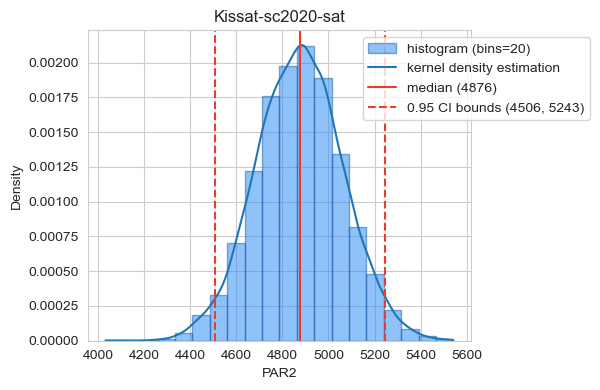

In [12]:
fig, ax = plt.subplots(1,1, figsize=(6.5,4))
plot_distribution(socomparison, "Kissat-sc2020-sat", ax=ax)

# comp_score = default_comparison.get_ranking().loc["Kissat-sc2020-sat", ("PAR2", "score")]
# ax.axvline(comp_score,
#                color="black",
#                linestyle="-",
#                label="comp. rank ({:.0f})".format(comp_score))
# ax.legend(loc="upper right", bbox_to_anchor=(1.33, 1.0))

ax.set_xlabel("PAR2")
plt.tight_layout()
plt.savefig("bootstrap_distribution.pdf")
plt.show()

Kissat-sc2020-sat vs cryptominisat-ccnr-lsids: 0.156
$H_0$: Kissat-sc2020-sat $\leq$ cryptominisat-ccnr-lsids
p-value = 0.156
accept


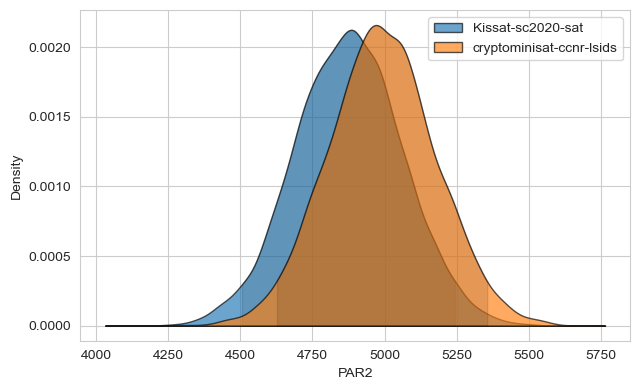

Kissat-sc2020-sat vs MapleLCMDistChronoBT-DL-f2trc: 0.0
$H_0$: Kissat-sc2020-sat $\leq$ MapleLCMDistChronoBT-DL-f2trc
p-value = 0.000
reject


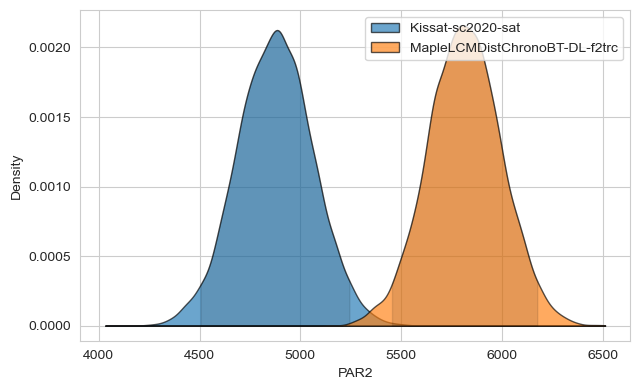

In [13]:
for number, algorithms in enumerate([
    ["Kissat-sc2020-sat", "cryptominisat-ccnr-lsids"],
    ["Kissat-sc2020-sat", "MapleLCMDistChronoBT-DL-f2trc"]
]):
    fig, ax = plt.subplots(1,1, figsize=(6.5,4))
    plot_distributions_comparison(socomparison, algorithms, ax=ax)
    ax.set_xlabel("PAR2")
    
    p_value = socomparison.statistical_test(algorithms[0], algorithms[1])
    text = f"$H_0$: {algorithms[0]} $\leq$ {algorithms[1]}\np-value = {p_value:.3f}\n{'reject' if p_value < 0.05 else 'accept'}"
    print(text)
    #ax.text(0.99, 0.99, text, transform=ax.transAxes, va="top", ha="right")
    
    plt.tight_layout()
    plt.savefig(f"bootstrap_distribution_{number}.pdf")
    plt.show()

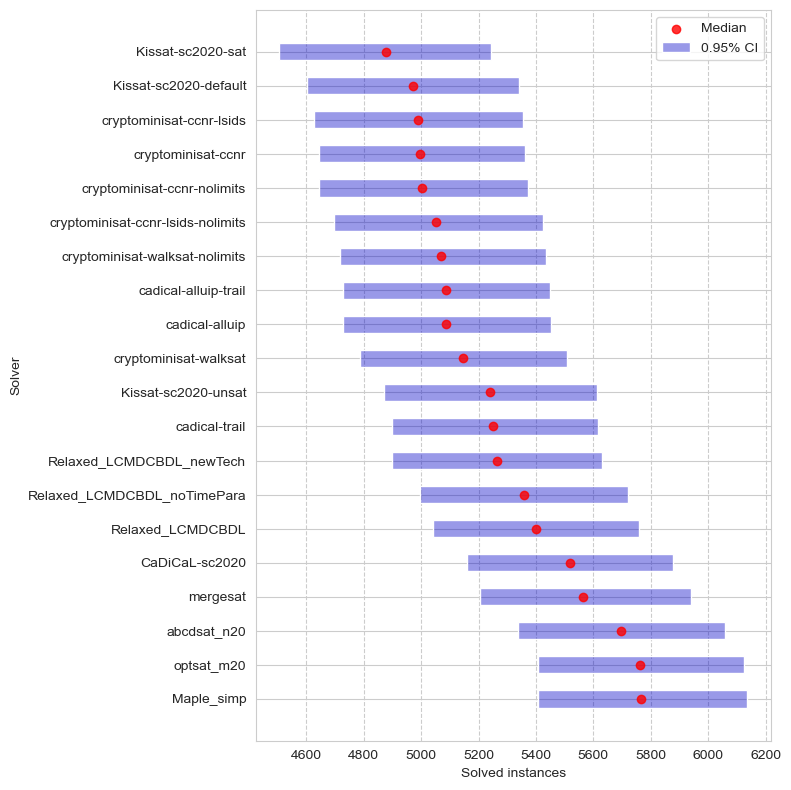

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_ci_list(socomparison, objective="PAR2", ax=ax, top=20)
ax.set_xlabel("Solved instances")
plt.tight_layout()
plt.show()

# MO Ranking

In [21]:
comparison = MOBootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise={"PAR2": True, "solved": False},
                                 bootstrap_runs=10000,
                                 aggregation_method={"PAR2": np.mean, "solved": np.sum})

In [22]:
%time bsrank = comparison.get_ranking()

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/Experiments/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")


CPU times: user 3min 12s, sys: 2 s, total: 3min 14s
Wall time: 3min 22s


In [23]:
def pareto_line(points: np.ndarray, maxima: list[float | int]):
    points = points[points.argsort(axis=0)[:,0],:]
    line = [[points[0, 0], maxima[1]]]
    for i, (x, y) in enumerate(points):
        line.append([x, y])
        if i+1 < len(points):
            line.append([points[i+1,0], y])
        else:
            line.append([maxima[0], y])
    return np.array(line)

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_13444/2500596218.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  ddf = ddf.merge(bsrank, left_index=True, right_index=True)


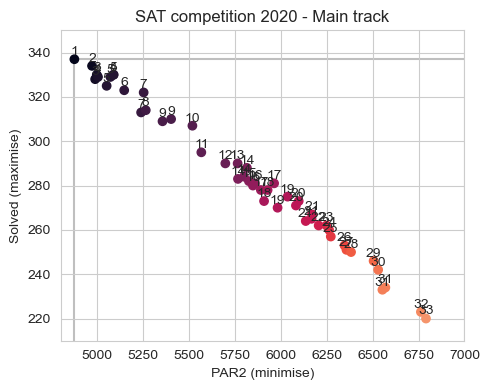

In [24]:
ddf = default_comparison.get_ranking().sort_values(("PAR2", "rank"))
ddf = ddf.merge(bsrank, left_index=True, right_index=True)
fig, ax = plt.subplots(1,1,figsize=(5,4))

points = ddf[[("PAR2", "score"), ("solved", "score")]].to_numpy()
points[:, 1] = -points[:, 1]
fronts , _, _, ndr = fast_non_dominated_sorting(points)
plt.scatter(ddf[("PAR2","score")], ddf[("solved","score")], c=ndr)
# for algo, row in ddf.iterrows():
#     # print(row[("PAR2","score")], row[("solved","score")])
#     plt.text(row[("PAR2","score")], row[("solved","score")], f"{row['group']:.0f}", clip_on=True)

for i, (algo, row) in enumerate(ddf.iterrows()):
    plt.text(row[("PAR2","score")], row[("solved","score")]+0.5, f"{ndr[i]+1}", clip_on=True, va="bottom", ha="center")

for algindex in np.argwhere(ndr == 0):
    iloc = algindex[0]
    series = ddf.iloc[iloc]
    # print(series.name)
    # print(series[("PAR2","score")], series[("solved","score")], series.name)
    #plt.text(series[("PAR2","score")], series[("solved","score")], series.name)
plt.title("SAT competition 2020 - Main track")

for i, front in enumerate(fronts[:1]):
    front_points = points[front, :]
    line = pareto_line(front_points, np.max(points, axis=0))
    line[:, 1] *= -1
    plt.plot(*line.T, color="grey", zorder=0, alpha=0.5)

# plt.xlim(4850, 5120)
plt.xlim(4800, 7000)
plt.xlabel("PAR2 (minimise)")
# plt.ylim(320, 350)
plt.ylim(210, 350)
plt.ylabel("Solved (maximise)")
plt.tight_layout()
plt.savefig("sat2023front.pdf")
plt.show()

In [30]:
ranking = bsrank.sort_values(["group", "group wins"], ascending=[True, False]).merge(default_comparison.get_ranking(), left_index=True, right_index=True)
for number, (algo, score) in enumerate(ranking.iloc[:15].iterrows()):
    print(f"${number+1}$ & ${score['group']:.0f}$ & {algo:36} & ${score['group wins']:.2f}$ & ${score[('PAR2', 'rank')]:.0f}$ & ${score[('PAR2', 'score')]:.0f}$  & ${score[('solved', 'score')]:.0f}$ \\\\")

$1$ & $1$ & Kissat-sc2020-sat                    & $0.69$ & $1$ & $4875$  & $337$ \\
$2$ & $1$ & Kissat-sc2020-default                & $0.22$ & $2$ & $4972$  & $334$ \\
$3$ & $1$ & cadical-alluip-trail                 & $0.09$ & $8$ & $5088$  & $330$ \\
$4$ & $1$ & cryptominisat-ccnr-lsids             & $0.08$ & $3$ & $4988$  & $328$ \\
$5$ & $1$ & cryptominisat-ccnr-nolimits          & $0.08$ & $5$ & $5004$  & $329$ \\
$6$ & $1$ & cryptominisat-ccnr                   & $0.08$ & $4$ & $4997$  & $330$ \\
$7$ & $1$ & cryptominisat-walksat-nolimits       & $0.06$ & $7$ & $5072$  & $329$ \\
$8$ & $1$ & cryptominisat-ccnr-lsids-nolimits    & $0.02$ & $6$ & $5051$  & $325$ \\
$9$ & $1$ & cadical-trail                        & $0.00$ & $12$ & $5253$  & $322$ \\
$10$ & $1$ & cryptominisat-walksat                & $0.00$ & $10$ & $5147$  & $323$ \\
$11$ & $1$ & cadical-alluip                       & $0.00$ & $9$ & $5089$  & $330$ \\
$12$ & $2$ & Kissat-sc2020-unsat                  & $0.56$ & 

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_13444/3882233502.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ranking = bsrank.sort_values(["group", "group wins"], ascending=[True, False]).merge(default_comparison.get_ranking(), left_index=True, right_index=True)


In [31]:
for group, grp in ranking.groupby("group"):
    names = [f"{a}~({r})" for a, r in zip(grp.index.to_list(), grp[("PAR2", "rank")].to_list())]
    names = ', '.join(names)
    names = names.replace("_", "\_")
    print(f"{group} & {len(grp)} & {names} \\\\")

1 & 11 & Kissat-sc2020-sat~(1), Kissat-sc2020-default~(2), cadical-alluip-trail~(8), cryptominisat-ccnr-lsids~(3), cryptominisat-ccnr-nolimits~(5), cryptominisat-ccnr~(4), cryptominisat-walksat-nolimits~(7), cryptominisat-ccnr-lsids-nolimits~(6), cadical-trail~(12), cryptominisat-walksat~(10), cadical-alluip~(9) \\
2 & 6 & Kissat-sc2020-unsat~(11), Relaxed\_LCMDCBDL\_newTech~(13), CaDiCaL-sc2020~(16), Relaxed\_LCMDCBDL~(15), Relaxed\_LCMDCBDL\_noTimePara~(14), mergesat~(17) \\
3 & 16 & abcdsat\_n20~(18), optsat\_m20~(19), MapleLCMDistChronoBT-DL-f2trc~(22), Maple\_simp~(20), Maple\_mix~(21), DurianSat~(23), MLCMDCHRONOBT-DL-V2.2SCAVELRFV~(29), MapleLCMDistChronoBT-f2trc~(25), Undominated-LC-MapleLCMDiscChronoBT-DL~(24), MapleLCMDistChronoBT-DL-v3~(26), ExMapleLCMDistChronoBT~(28), MLCMDChronoBT-DL-Scavel~(31), MapleCOMSPS\_LRB\_VSIDS\_2~(27), MapleLCMDistChronoBT-f2trc-s~(30), MapleLCMDistChronoBT-DL-Scavel01~(33), exp\_V\_MLD\_CBT\_DL~(32) \\
4 & 12 & SLIME~(34), MapleLCMDistChronoBT-

$H_0$: Kissat-sc2020-sat $\succeq$ cadical-alluip
p-value = 0.177
accept


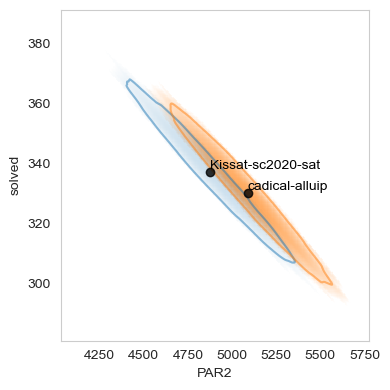

$H_0$: Kissat-sc2020-sat $\succeq$ mergesat
p-value = 0.000
reject


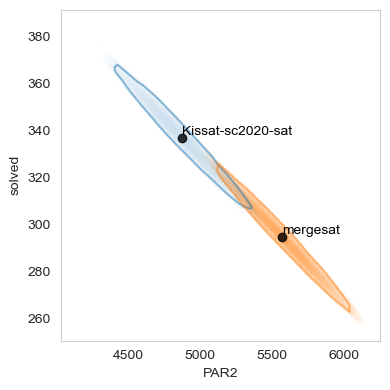

In [26]:
def plot_ci_density_estimations(
        comparison: MOBootstrapComparison,
        algorithms: list | str = None,
        show_names: bool = False,
        ax=None):
    show = False
    if ax is None:
        show = True
        fig, ax = plt.subplots(figsize=(6, 6))

    cache = comparison._get_cache()
    performances = cache["distributions"]
    meta_data = cache["meta_data"]

    end_colors = [
        (0, 0, 1, 0.8),
        (0, 1, 0, 0.8),
        (1, 0, 0, 0.8),
        (0, 1, 1, 0.8),
        (1, 0, 1, 0.8),
        (1, 1, 0, 0.8),
    ]

    prop_cycle = plt.rcParams['axes.prop_cycle']
    end_colors = prop_cycle.by_key()['color']

    if isinstance(algorithms, str):
        algorithms = [algorithms]

    algids = [a in algorithms for a in meta_data["algorithms"]]
    for cid, algname in enumerate(algorithms):
        alg = meta_data["algorithms"].index(algname)
        x = performances[alg, :, 0]
        y = performances[alg, :, 1]
        k = gaussian_kde([x, y])
        resolution = 256
        xi, yi = np.mgrid[
                 performances[algids, :, 0].min():performances[algids, :, 0].max():resolution * 1j,
                 performances[algids, :, 1].min():performances[algids, :, 1].max():resolution * 1j
                 ]
        zi = k(np.vstack([xi.flatten(), yi.flatten()]))
        zi = (zi - zi.min()) / (zi.max() - zi.min())  # Normalize to be able to get quantiles

        colors = [
            (1, 1, 1, 0),
            end_colors[cid % len(end_colors)]
        ]
        cmap1 = LinearSegmentedColormap.from_list("alpha", colors, N=256)

        ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading="auto", cmap=cmap1, zorder=1, norm=LogNorm(vmin=0.01),
                       alpha=0.66)
        levels = [0.05] #, 0.25, 0.5]  # 95% and 75%, 50% ci
        ax.contour(xi, yi, zi.reshape(xi.shape),
                    levels=levels,
                    colors=len(levels) * [end_colors[cid % len(end_colors)]],
                    zorder=2,
                    alpha=0.5)
        if show_names:
            plt.text(np.mean(x), np.mean(y), f"{algname}", zorder=30, ha="left", va="bottom", c="black")

    # for s1, s2 in itertools.product(algorithms, repeat=2):
    #     print(f"H0: {s1:24} is dominated by or incomparable {s2:24}: p-value={comparison.statistical_test(s1, s2)}")

    ax.scatter(*zip(*(np.mean(performances[algids], axis=1).tolist())), c="black", alpha=0.8, zorder=3)
    ax.set_xlabel(meta_data["objectives"][0])
    ax.set_ylabel(meta_data["objectives"][1])

    # plt.grid()
    if show:
        plt.tight_layout()
        plt.show()

for algorithms in [
    ["Kissat-sc2020-sat", "cadical-alluip"],
    ["Kissat-sc2020-sat", "mergesat"]
]:
    fig, ax = plt.subplots(figsize=(4, 4))
    plot_ci_density_estimations(comparison, algorithms, show_names=True, ax=ax)
    
    p_value = comparison.statistical_test(algorithms[0], algorithms[1])
    text = f"$H_0$: {algorithms[0]} $\succeq$ {algorithms[1]}\np-value = {p_value:.3f}\n{'reject' if p_value < 0.05 else 'accept'}"
    print(text)
    # ax.text(0.99, 0.99, text, transform=ax.transAxes, va="top", ha="right")
    # ax.grid()
    plt.tight_layout()
    plt.savefig(f"mo_densities_{algorithms[1]}.pdf")
    plt.show()